# Class 2: Slightly Less Basic Basics of Neural Networks

## Preliminaries

Run the cell below to download the course library.

In [ ]:
import gdown

gdown.download(id='1SzvuBYIZ407c9eOChXD48NG94v7azJby')

Downloading...
From (original): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby
From (redirected): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby&confirm=t&uuid=ff941b94-75d4-49f9-a436-247b3f5f42e2
To: /content/sdx.py
100%|██████████| 2.83k/2.83k [00:00<00:00, 9.60MB/s]


'sdx.py'

Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [ ]:
from tensorflow import keras
from sdx import *

## Loading the training and testing data

We will continue using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Reminder: there are 60000 images for training and 10000 for testing.

## Revisiting the pseudo neural network

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=32,
    batch_size=32,
    validation_data=(test_images, test_labels),
);

Epoch 1/32
1875/1875 [==============================] - 6s 3ms/step - loss: 9.8752 - val_loss: 8.5510
Epoch 2/32
1875/1875 [==============================] - 4s 2ms/step - loss: 6.2533 - val_loss: 5.5843
Epoch 3/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7744 - val_loss: 6.1808
Epoch 4/32
1875/1875 [==============================] - 5s 2ms/step - loss: 5.5112 - val_loss: 5.0547
Epoch 5/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3836 - val_loss: 5.6849
Epoch 6/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2450 - val_loss: 5.8144
Epoch 7/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2472 - val_loss: 5.2935
Epoch 8/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1095 - val_loss: 4.5778
Epoch 9/32
1875/1875 [==============================] - 5s 3ms/step - loss: 5.2333 - val_loss: 5.8506
Epoch 10/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.059

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 6.0796


6.079566955566406

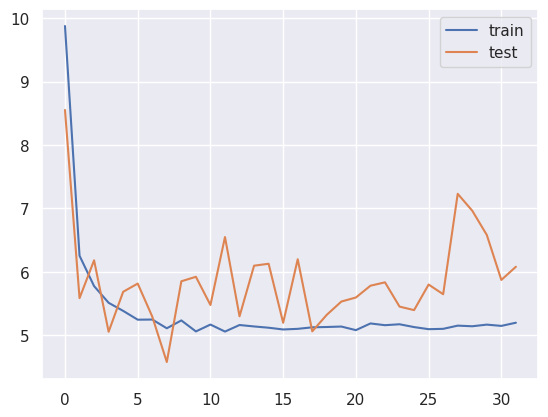

In [ ]:
plot_loss(history)

## Revisiting the single-layer neural network

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(397),
    keras.layers.Dense(10),
])

model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 397)               311645    
                                                                 
 dense_2 (Dense)             (None, 10)                3980      
                                                                 
Total params: 315625 (1.20 MB)
Trainable params: 315625 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1875/1875 [==============================] - 6s 3ms/step - loss: 24.1653 - val_loss: 5.8742
Epoch 2/32
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1086 - val_loss: 6.5725
Epoch 3/32
1875/1875 [==============================] - 5s 3ms/step - loss: 4.1175 - val_loss: 4.8531
Epoch 4/32
1875/1875 [==============================] - 4s 2ms/step - loss: 3.9601 - val_loss: 4.7731
Epoch 5/32
1875/1875 [==============================] - 4s 2ms/step - loss: 3.8733 - val_loss: 3.7163
Epoch 6/32
1875/1875 [==============================] - 5s 3ms/step - loss: 3.8345 - val_loss: 3.1783
Epoch 7/32
1875/1875 [==============================] - 5s 2ms/step - loss: 3.7888 - val_loss: 5.3818
Epoch 8/32
1875/1875 [==============================] - 5s 3ms/step - loss: 3.7872 - val_loss: 4.3811
Epoch 9/32
1875/1875 [==============================] - 5s 3ms/step - loss: 3.7872 - val_loss: 5.1132
Epoch 10/32
1875/1875 [==============================] - 4s 2ms/step - loss: 3.77

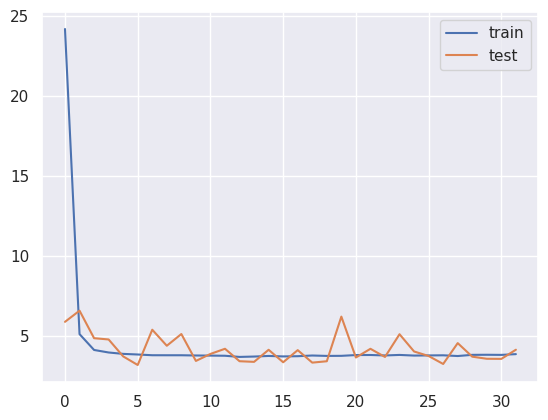

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=32,
    batch_size=32,
    validation_data=(test_images, test_labels),
);

plot_loss(history)

## Revisiting the activation parameter

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(397, activation='relu'),
    keras.layers.Dense(10),
])

model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 397)               311645    
                                                                 
 dense_4 (Dense)             (None, 10)                3980      
                                                                 
Total params: 315625 (1.20 MB)
Trainable params: 315625 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1875/1875 [==============================] - 5s 2ms/step - loss: 3.2489 - val_loss: 0.6554
Epoch 2/32
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5995 - val_loss: 0.7156
Epoch 3/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4751 - val_loss: 0.6122
Epoch 4/32
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4180 - val_loss: 0.7038
Epoch 5/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3719 - val_loss: 0.6689
Epoch 6/32
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3423 - val_loss: 0.6850
Epoch 7/32
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3240 - val_loss: 0.7281
Epoch 8/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - val_loss: 0.6759
Epoch 9/32
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2657 - val_loss: 0.7090
Epoch 10/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.288

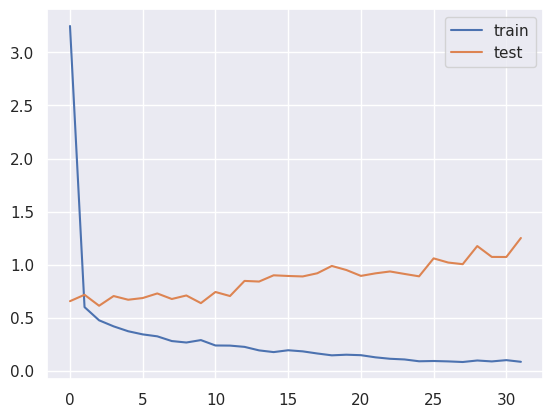

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=32,
    batch_size=32,
    validation_data=(test_images, test_labels),
);

plot_loss(history)

You can click on the toc.png tab to the left to browse by section.